# Project Goal: Forecasting gold price for next 30 days
##  Business Objective:
Understand the underlying structure in your dataset and come up with a suitable forecasting model which can effectively forecast gold prices for next 30 days

### 1. Import Necessary Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as smf
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import altair as alt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import os


### 2. Importing Data

In [84]:
Gold_Price  = pd.read_csv("C:/Users/Hp/Downloads/Gold_data.csv")
Gold_Price

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


## Exploratory Data Analysis(EDA)
### 3. Data Understanding

In [85]:
Gold_Price.shape

(2182, 2)

In [86]:
Gold_Price.info

<bound method DataFrame.info of             date    price
0     2016-01-01  2252.60
1     2016-01-02  2454.50
2     2016-01-03  2708.10
3     2016-01-04  2577.80
4     2016-01-05  2597.75
...          ...      ...
2177  2021-12-17  4394.40
2178  2021-12-18  4389.50
2179  2021-12-19  4389.50
2180  2021-12-20  4354.10
2181  2021-12-21  4346.50

[2182 rows x 2 columns]>

In [87]:
Gold_Price.dtypes

date      object
price    float64
dtype: object

#### Date is objective type data

In [88]:
Gold_Price.isna().sum()

date     0
price    0
dtype: int64

#### There is no null values in the data set

In [89]:
Gold_Price.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [90]:
Gold_Price.describe(include='all')

,date,price
count,2182,2182.000000
unique,2182,NaN
top,2016-01-01,NaN
freq,1,NaN
mean,NaN,3284.450046
std,NaN,719.564434
min,NaN,2252.600000
25%,NaN,2697.020000
50%,NaN,2879.800000
75%,NaN,4147.325000


In [91]:
Gold_Price.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [92]:
Gold_Price.value_counts()

date        price 
2016-01-01  2252.6    1
2019-12-28  3464.2    1
2019-12-22  3375.1    1
2019-12-23  3398.0    1
2019-12-24  3431.0    1
                     ..
2017-12-22  2598.7    1
2017-12-21  2599.0    1
2017-12-20  2597.1    1
2017-12-19  2591.5    1
2021-12-21  4346.5    1
Length: 2182, dtype: int64

### 4. Data Preparation
#### 1.Since date columnn is objective type data need to change it to type date time

In [93]:
Gold_Price['date'] = pd.to_datetime(Gold_Price['date'])
Gold_Price

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [94]:
Gold_Price.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [95]:
Gold_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


### 2. Chaining index to the data in order to make it proper time series data

In [96]:
Gold_Price_New = pd.read_csv('C:/Users/Hp/Downloads/Gold_data.csv', header=0, index_col=0,squeeze=True,parse_dates=True)
Gold_Price_New

date
2016-01-01    2252.60
2016-01-02    2454.50
2016-01-03    2708.10
2016-01-04    2577.80
2016-01-05    2597.75
               ...   
2021-12-17    4394.40
2021-12-18    4389.50
2021-12-19    4389.50
2021-12-20    4354.10
2021-12-21    4346.50
Name: price, Length: 2182, dtype: float64

In [97]:
Gold_Price_New.shape

(2182,)

### 4. Box plot for checking outliers present in my dataset

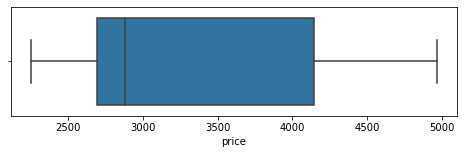

In [98]:
plt.figure(figsize=(8,2))
ax=sns.boxplot(x=Gold_Price['price'],whis=1.5)

#### There are no outliers present in my dataset

## Visualization of data distribution
### 1. Histogram

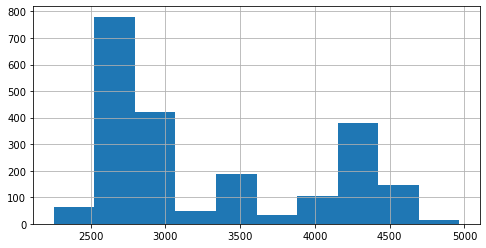

In [99]:
plt.figure(figsize=(8,4))
Gold_Price_New.hist()
plt.show()

### 2. Plot

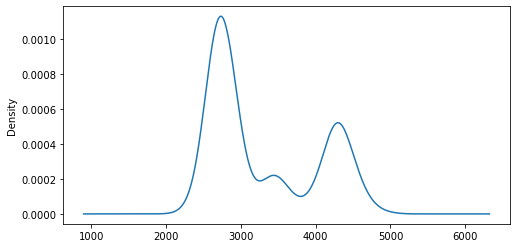

In [100]:
plt.figure(figsize=(8,4))
Gold_Price_New.plot(kind='kde')
plt.show()

#### The growth in the price has much more of an exponential growth

In [101]:
Gold_Price['price']=round(Gold_Price['price'])
Gold_Price['Year']=Gold_Price['date'].dt.year
Gold_Price['Month_of_Year']=Gold_Price['date'].dt.month

### Boxplot for all the month throughout all the years

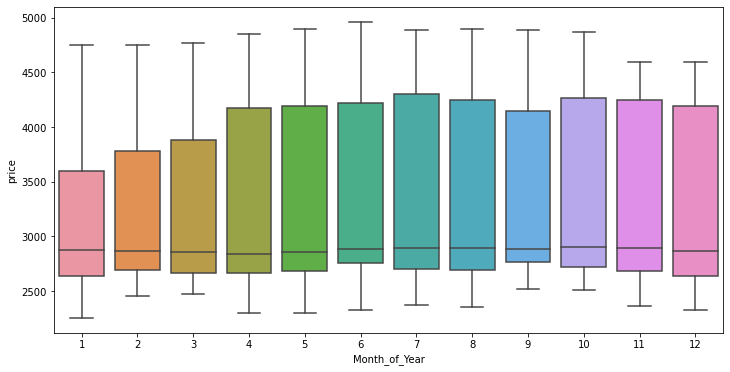

In [102]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Month_of_Year', y='price',data=Gold_Price)
plt.show()

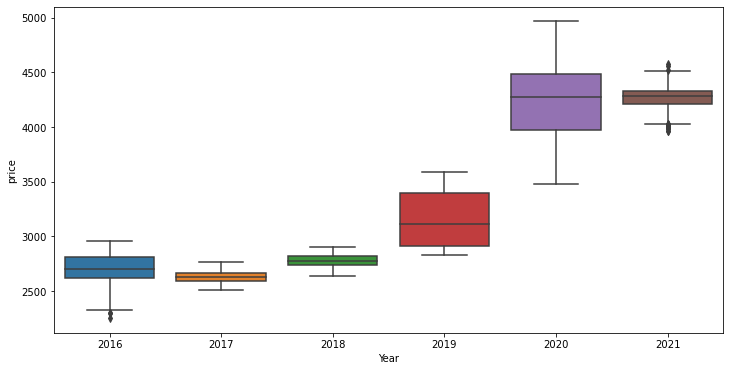

In [103]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Year', y='price',data=Gold_Price)
plt.show()

### The growth in the price has much more of an exponential growth

## Time series decomposition plot
### * To find the clear trend
### * To find the seasonality(Additive/Multiplicative)

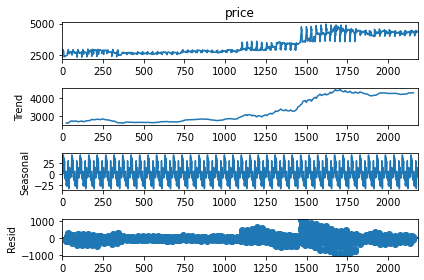

In [104]:
decompose_ts_add = seasonal_decompose(Gold_Price['price'], period=52)
decompose_ts_add.plot()
plt.show()

In [105]:
Gold_Price["date"]= pd.to_datetime(Gold_Price["date"])
indexdata=Gold_Price.set_index(["date"])

In [106]:
resample = indexdata.resample('M') #M for monthly basis
goldp = resample.mean()
goldp

,price,Year,Month_of_Year
date,,,
2016-01-31,2495.870968,2016.0,1.0
2016-02-29,2688.689655,2016.0,2.0
2016-03-31,2682.903226,2016.0,3.0
2016-04-30,2677.800000,2016.0,4.0
2016-05-31,2677.709677,2016.0,5.0
...,...,...,...
2021-08-31,4264.870968,2021.0,8.0
2021-09-30,4207.533333,2021.0,9.0
2021-10-31,4289.129032,2021.0,10.0


In [107]:
goldp.head(10)

,price,Year,Month_of_Year
date,,,
2016-01-31,2495.870968,2016.0,1.0
2016-02-29,2688.689655,2016.0,2.0
2016-03-31,2682.903226,2016.0,3.0
2016-04-30,2677.800000,2016.0,4.0
2016-05-31,2677.709677,2016.0,5.0
2016-06-30,2745.633333,2016.0,6.0
2016-07-31,2779.645161,2016.0,7.0
2016-08-31,2792.225806,2016.0,8.0
2016-09-30,2792.633333,2016.0,9.0


## Checking for stationality
###  Augmented Dickey fuller test

In [108]:
adf = adfuller(Gold_Price_New[:2182])[1]
print(f"p value:{adf.round(4)}", ", Series is Stationary" if adf <0.05 else ", Series is Non-Stationary")

p value:0.9241 , Series is Non-Stationary


## Differencing

p value:0.0 , Series is Stationary


<AxesSubplot:xlabel='date'>

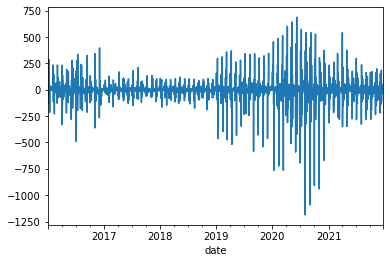

In [109]:
de_trended = Gold_Price_New.diff(1).dropna()
adf2 = adfuller(de_trended)[1]
print(f"p value:{adf2}", ", Series is Stationary" if adf2 <0.05 else ", Series is Non-Stationary")
de_trended.plot()

### Splitting Data

In [110]:
train=Gold_Price[0:1528]
test=Gold_Price[1528:]

In [111]:
train.tail(10)

,date,price,Year,Month_of_Year
1518,2020-02-27,3773.0,2020,2
1519,2020-02-28,3670.0,2020,2
1520,2020-02-29,3673.0,2020,2
1521,2020-03-01,3565.0,2020,3
1522,2020-03-02,3611.0,2020,3
1523,2020-03-03,3845.0,2020,3
1524,2020-03-04,3979.0,2020,3
1525,2020-03-05,4128.0,2020,3
1526,2020-03-06,4106.0,2020,3
1527,2020-03-07,4255.0,2020,3


In [112]:
test

,date,price,Year,Month_of_Year
1528,2020-03-08,4770.0,2020,3
1529,2020-03-09,4554.0,2020,3
1530,2020-03-10,4473.0,2020,3
1531,2020-03-11,4573.0,2020,3
1532,2020-03-12,4365.0,2020,3
...,...,...,...,...
2177,2021-12-17,4394.0,2021,12
2178,2021-12-18,4390.0,2021,12
2179,2021-12-19,4390.0,2021,12
2180,2021-12-20,4354.0,2021,12


## Holt Winters Model

In [113]:
hwmodel=ExponentialSmoothing (train.price,trend='add',seasonal='mul',seasonal_periods=52).fit()

In [114]:
test_pred=hwmodel.forecast(654)

In [115]:
test_pred

1528    4244.674308
1529    4254.729749
1530    4238.343411
1531    4208.671100
1532    4229.027654
           ...     
2177    5682.666746
2178    5749.680009
2179    5631.162418
2180    5345.961286
2181    5555.764674
Length: 654, dtype: float64

<AxesSubplot:>

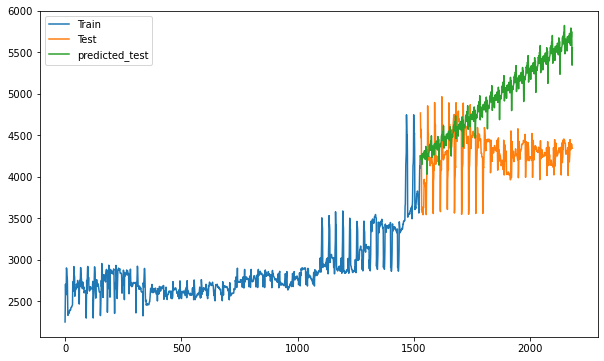

In [116]:
train['price'].plot(legend = True,label='Train',figsize=(10,6))
test['price'].plot(legend = True,label='Test')
test_pred.plot(legend = True,label='predicted_test')


In [117]:
train2=Gold_Price[0:2152]
test2=Gold_Price[2152:]

In [118]:
train2.tail(10)

,date,price,Year,Month_of_Year
2142,2021-11-12,4334.0,2021,11
2143,2021-11-13,4451.0,2021,11
2144,2021-11-14,4451.0,2021,11
2145,2021-11-15,4456.0,2021,11
2146,2021-11-16,4421.0,2021,11
2147,2021-11-17,4444.0,2021,11
2148,2021-11-18,4423.0,2021,11
2149,2021-11-19,4410.0,2021,11
2150,2021-11-20,4404.0,2021,11
2151,2021-11-21,4404.0,2021,11


In [119]:
test2

,date,price,Year,Month_of_Year
2152,2021-11-22,4311.0,2021,11
2153,2021-11-23,4275.0,2021,11
2154,2021-11-24,4274.0,2021,11
2155,2021-11-25,4278.0,2021,11
2156,2021-11-26,4316.0,2021,11
2157,2021-11-27,4319.0,2021,11
2158,2021-11-28,4319.0,2021,11
2159,2021-11-29,4304.0,2021,11
2160,2021-11-30,4277.0,2021,11
2161,2021-12-01,4353.0,2021,12


In [120]:
hwmodel=ExponentialSmoothing (train2.price,trend='add',seasonal='mul',seasonal_periods=52).fit()

In [121]:
test2_pred=hwmodel.forecast(30)

In [122]:
test2_pred

2152    4295.406051
2153    4229.610825
2154    4151.734610
2155    4197.946986
2156    4166.906381
2157    4131.549656
2158    4104.988451
2159    4100.303788
2160    4118.523020
2161    4113.938230
2162    4172.480903
2163    4168.796998
2164    4203.577325
2165    4193.325318
2166    4174.065203
2167    4251.671821
2168    4308.873622
2169    4356.948528
2170    4391.681829
2171    4402.871295
2172    4413.150610
2173    4422.790752
2174    4492.109626
2175    4586.247593
2176    4640.666601
2177    4797.515556
2178    4814.436741
2179    4798.103953
2180    4779.043602
2181    4723.028094
dtype: float64

<AxesSubplot:>

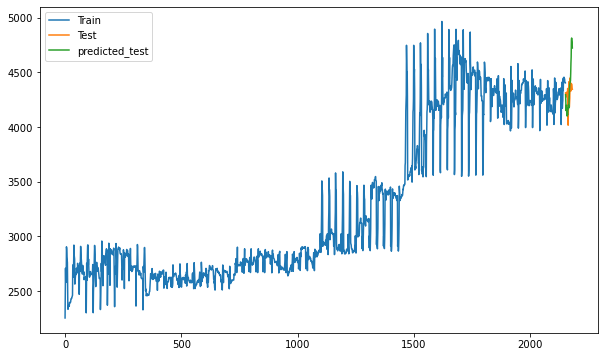

In [123]:
train2['price'].plot(legend = True,label='Train',figsize=(10,6))
test2['price'].plot(legend = True,label='Test')
test2_pred.plot(legend = True,label='predicted_test')


In [124]:
train3=Gold_Price[0:2182]
test3=Gold_Price[2182:]

In [125]:
train3.tail(10)

,date,price,Year,Month_of_Year
2172,2021-12-12,4334.0,2021,12
2173,2021-12-13,4351.0,2021,12
2174,2021-12-14,4328.0,2021,12
2175,2021-12-15,4349.0,2021,12
2176,2021-12-16,4400.0,2021,12
2177,2021-12-17,4394.0,2021,12
2178,2021-12-18,4390.0,2021,12
2179,2021-12-19,4390.0,2021,12
2180,2021-12-20,4354.0,2021,12
2181,2021-12-21,4346.0,2021,12


In [126]:
test3

,date,price,Year,Month_of_Year


In [127]:
hwmodel=ExponentialSmoothing (train3.price,trend='add',seasonal='mul',seasonal_periods=52).fit()

In [128]:
test3_pred=hwmodel.forecast(30)

In [129]:
test3_pred

2182    4300.197419
2183    4260.533718
2184    4271.965015
2185    4249.660370
2186    4297.536057
2187    4298.111764
2188    4265.969147
2189    4242.334892
2190    4247.058525
2191    4286.998444
2192    4273.521261
2193    4256.916860
2194    4190.166451
2195    4213.336637
2196    4262.548047
2197    4272.091524
2198    4388.182074
2199    4404.646611
2200    4372.258815
2201    4317.172147
2202    4223.690582
2203    4121.770715
2204    4028.268445
2205    3969.437889
2206    3904.466781
2207    3930.878125
2208    3915.519676
2209    3880.694194
2210    3853.660128
2211    3843.202823
dtype: float64

<AxesSubplot:>

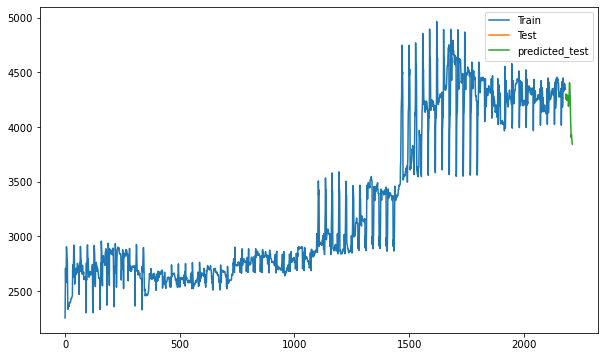

In [130]:
train3['price'].plot(legend = True,label='Train',figsize=(10,6))
test3['price'].plot(legend = True,label='Test')
test3_pred.plot(legend = True,label='predicted_test')


In [131]:
train4=Gold_Price[0:1746]
test4=Gold_Price[1746:]

In [132]:
train4.tail(10)

,date,price,Year,Month_of_Year
1736,2020-10-02,3603.0,2020,10
1737,2020-10-03,3890.0,2020,10
1738,2020-10-04,4118.0,2020,10
1739,2020-10-05,4133.0,2020,10
1740,2020-10-06,4222.0,2020,10
1741,2020-10-07,4341.0,2020,10
1742,2020-10-08,4869.0,2020,10
1743,2020-10-09,4586.0,2020,10
1744,2020-10-10,4519.0,2020,10
1745,2020-10-11,4474.0,2020,10


In [133]:
test4

,date,price,Year,Month_of_Year
1746,2020-10-12,4343.0,2020,10
1747,2020-10-13,4461.0,2020,10
1748,2020-10-14,4473.0,2020,10
1749,2020-10-15,4493.0,2020,10
1750,2020-10-16,4479.0,2020,10
...,...,...,...,...
2177,2021-12-17,4394.0,2021,12
2178,2021-12-18,4390.0,2021,12
2179,2021-12-19,4390.0,2021,12
2180,2021-12-20,4354.0,2021,12


In [134]:
hwmodel=ExponentialSmoothing (train4.price,trend='add',seasonal='mul',seasonal_periods=52).fit()

In [135]:
test4_pred=hwmodel.forecast(30)

In [136]:
test4_pred

1746    4451.029638
1747    4310.131021
1748    4397.888809
1749    4485.545650
1750    4468.398635
1751    4547.417647
1752    4528.302629
1753    4629.151367
1754    4742.463843
1755    4626.644711
1756    4659.497116
1757    4509.759367
1758    4699.847969
1759    4982.798733
1760    5000.335837
1761    5027.214394
1762    5139.107873
1763    5207.471542
1764    5188.002332
1765    4929.203335
1766    4954.705119
1767    5047.634589
1768    5014.136805
1769    4972.455674
1770    4945.470357
1771    5016.233002
1772    4985.676901
1773    4970.054501
1774    4974.601146
1775    5004.524701
dtype: float64

<AxesSubplot:>

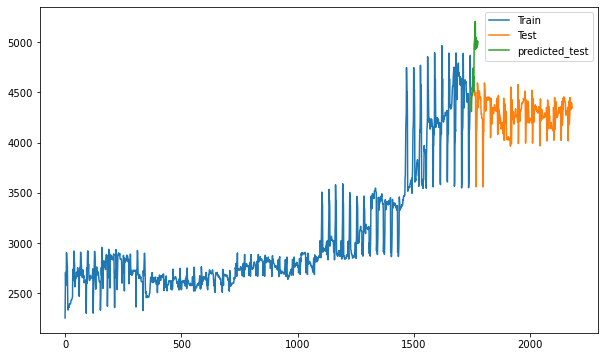

In [137]:
train4['price'].plot(legend = True,label='Train',figsize=(10,6))
test4['price'].plot(legend = True,label='Test')
test4_pred.plot(legend = True,label='predicted_test')


## MAPE



In [138]:
# Formula of Error written once by using a function MAPE (Mean Absolute % Error)

def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100  
    return np.mean(temp)

In [139]:
hwe_model_mul_add = ExponentialSmoothing(train["price"],seasonal="mul",trend="add",seasonal_periods=52).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.price)

16.746987483667787

In [140]:
hwe_model_mul_add = ExponentialSmoothing(train2["price"],seasonal="mul",trend="add",seasonal_periods=52).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test2.index[0],end = test2.index[-1])
MAPE(pred_hwe_mul_add,test2.price)

4.1221756028444805

In [141]:
hwe_model_mul_add = ExponentialSmoothing(train4["price"],seasonal="mul",trend="add",seasonal_periods=52).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test4.index[0],end = test4.index[-1])
MAPE(pred_hwe_mul_add,test4.price)

21.03131154654777

## RMSE

In [142]:
from sklearn.metrics import mean_squared_error
def RMSE(pred,org):
    temp=mean_squared_error(org,pred)
    return np.sqrt(temp).round(2)

In [143]:
hwe_model_mul_add = ExponentialSmoothing(train["price"],seasonal="mul",trend="add",seasonal_periods=52).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_hwe_mul_add,test.price)

827.3

In [144]:
hwe_model_mul_add = ExponentialSmoothing(train2["price"],seasonal="mul",trend="add",seasonal_periods=52).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test2.index[0],end = test2.index[-1])
RMSE(pred_hwe_mul_add,test2.price)

215.41

In [145]:
hwe_model_mul_add = ExponentialSmoothing(train4["price"],seasonal="mul",trend="add",seasonal_periods=52).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test4.index[0],end = test4.index[-1])
RMSE(pred_hwe_mul_add,test4.price)

972.93

In [146]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [147]:
Gold_Price = read_csv('C:/Users/Hp/Downloads/Gold_data.csv', header=0, index_col=0, parse_dates=True)

In [148]:
# separate out a validation dataset
split_point = len(Gold_Price) - 30
dataset, validation =Gold_Price[0:split_point], Gold_Price[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 2152, Validation 30


In [149]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float64')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]


In [150]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2811.300, Expected=2872.500
>Predicted=2872.500, Expected=2851.600
>Predicted=2851.600, Expected=2860.300
>Predicted=2860.300, Expected=2860.400
>Predicted=2860.400, Expected=2860.400
>Predicted=2860.400, Expected=2863.900
>Predicted=2863.900, Expected=2818.200
>Predicted=2818.200, Expected=2811.900
>Predicted=2811.900, Expected=2839.000
>Predicted=2839.000, Expected=2827.900
>Predicted=2827.900, Expected=2827.700
>Predicted=2827.700, Expected=2827.300
>Predicted=2827.300, Expected=2851.900
>Predicted=2851.900, Expected=2857.400
>Predicted=2857.400, Expected=2849.000
>Predicted=2849.000, Expected=2871.500
>Predicted=2871.500, Expected=2869.000
>Predicted=2869.000, Expected=2869.000
>Predicted=2869.000, Expected=2869.000
>Predicted=2869.000, Expected=2859.100
>Predicted=2859.100, Expected=2865.800
>Predicted=2865.800, Expected=3024.500
>Predicted=3024.500, Expected=2948.500
>Predicted=2948.500, Expected=2858.700
>Predicted=2858.700, Expected=2853.400
>Predicted=2853.400, Expe

In [151]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [152]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [153]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
warnings.filterwarnings("ignore")
#evaluate_models(train.values, p_values, d_values, q_values)

In [154]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [155]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

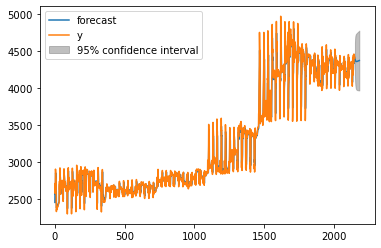

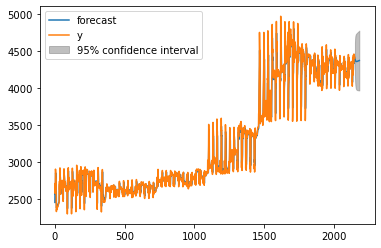

In [174]:
# fit model
model = ARIMA(X, order=(1,1,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=30)[0]
model_fit.plot_predict(1,2182)


In [175]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

99.1183888900538

In [176]:
# fit model
data = read_csv('C:/Users/Hp/Downloads/Gold_data.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [177]:
model = ARIMA(X, order=(1,1,1))
model_fit = model.fit()

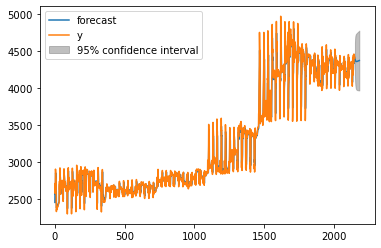

In [179]:
forecast=model_fit.forecast(steps=30)[0]
model_fit.plot_predict(1,2182);

In [161]:
forecast

array([4391.5629991 , 4381.86596098, 4374.46725121, 4368.86515   ,
       4364.66746185, 4361.56760663, 4359.32592993, 4357.75509336,
       4356.70865408, 4356.07213735, 4355.75605803, 4355.69046537,
       4355.82067872, 4356.10395407, 4356.50687833, 4357.00333244,
       4357.57289903, 4358.19961782, 4358.87101262, 4359.57733076,
       4360.31094855, 4361.06590654, 4361.83754622, 4362.62222601,
       4363.41709929, 4364.21994083, 4365.02901119, 4365.84295064,
       4366.66069625, 4367.48141716])

In [ ]:
Model Name	   Train	Test	MAPE	RMSE

Holt Winter	   1528 	654	   16.74	827.3

	           2152	    30	   4.12	    215.41
               
               
				
ARIMA	       2152	    30              99.11